### Part 1: Adversarial Set - AddSent (Error analysis)

#### Error Classification

In [138]:
import json, os

# Define the categories
categories = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Function to classify errors
def classify_error(example):
    question = example["question"].lower()
    predicted_answer = example["predicted_answer"].lower()
    correct_answers = [answer.lower() for answer in example["answers"]["text"]]

    # Check for numerical errors
    if any(char.isdigit() for char in predicted_answer):
        return "Numerical Errors"

    # Check for entity errors
    if any(entity in question for entity in ["where", "who", "what", "which", "when"]):
        return "Entity Errors"
    
    # Default to contextual errors
    return "Contextual Errors"

# Read the JSONL file and classify each example
with open('addSent_incorrect_pred.jsonl', 'r') as file:
    for line in file:
        example = json.loads(line)
        category = classify_error(example)
        categories[category].append(example)

# Print the results
for category, examples in categories.items():
    print(f"{category}: {len(examples)} examples")

Entity Errors: 69 examples
Numerical Errors: 23 examples
Contextual Errors: 7 examples


In [139]:
# import shutil
# # Save the classified examples to separate files
# if (os.path.exists('addSent_error_classes')):
#     shutil.rmtree('addSent_error_classes')
# os.mkdir('addSent_error_classes')
# for category, examples in categories.items():
#     with open(f'addSent_error_classes/{category.replace(" ", "_").lower()}.jsonl', 'w') as file:
#         for example in examples:
#             file.write(json.dumps(example) + '\n')

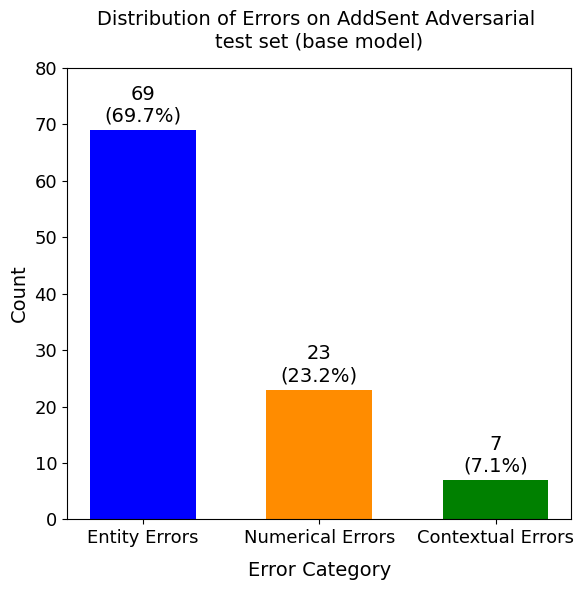

In [140]:
import matplotlib.pyplot as plt

def plot_bar(ylim, title):
    # Data
    category_names = categories.keys()
    counts = [len(examples) for examples in categories.values()]
    total = sum(counts)
    percentages = [count / total * 100 for count in counts]

    # Create bar chart
    plt.figure(figsize=(6, 6))  # Adjust the figure size to fit one column
    bars = plt.bar(category_names, counts, color=['blue', 'darkorange', 'green'], width=0.6)
    plt.xlabel('Error Category', fontsize=14, labelpad=10)
    plt.ylabel('Count', fontsize=14)
    plt.ylim(0, ylim) 
    plt.title(title, fontsize=14, pad=15)
    plt.bar_label(bars, labels=[f'{count}\n({percentage:.1f}%)' for count, percentage in zip(counts, percentages)], label_type='edge', fontsize=14, padding=3)

    plt.xticks(fontsize=13)  # Increase the fontsize for x-axis labels
    plt.yticks(fontsize=13)
    plt.tight_layout()  # Adjust layout to make sure everything fits well
    plt.show()

plot_bar(ylim=80, title='Distribution of Errors on AddSent Adversarial \ntest set (base model)')

### Part 1: Adversarial Set - AddAny (Error analysis)

##### Error Classification

In [141]:
# Reset the categories
categories = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Read the JSONL file and classify each example
with open('addAny_incorrect_pred.jsonl', 'r') as file:
    for line in file:
        example = json.loads(line)
        category = classify_error(example)
        categories[category].append(example)

# Print the results
for category, examples in categories.items():
    print(f"{category}: {len(examples)} examples")

Entity Errors: 45 examples
Numerical Errors: 15 examples
Contextual Errors: 5 examples


In [142]:
# import shutil
# # Save the classified examples to separate files
# if (os.path.exists('addAny_error_classes')):
#     shutil.rmtree('addAny_error_classes')
# os.mkdir('addAny_error_classes')
# for category, examples in categories.items():
#     with open(f'addAny_error_classes/{category.replace(" ", "_").lower()}.jsonl', 'w') as file:
#         for example in examples:
#             file.write(json.dumps(example) + '\n')

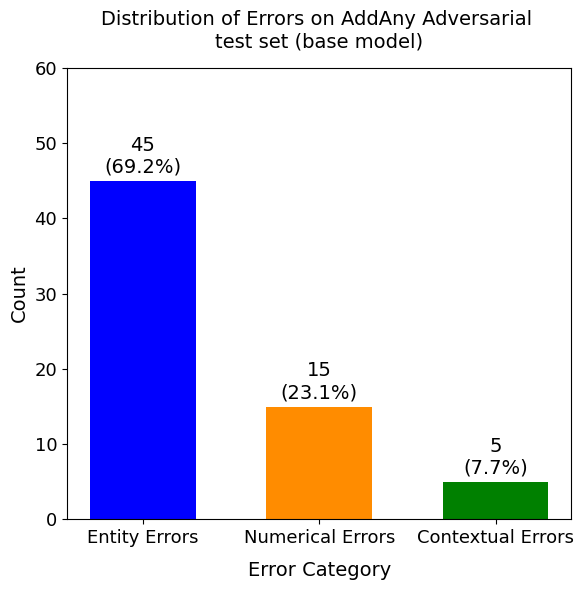

In [143]:
plot_bar(ylim=60, title='Distribution of Errors on AddAny Adversarial \ntest set (base model)')

### Part 1: Adversarial Set - AddCommon (Error analysis)

In [144]:
# Reset the categories
categories = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Read the JSONL file and classify each example
with open('addCommon_incorrect_pred.jsonl', 'r') as file:
    for line in file:
        example = json.loads(line)
        category = classify_error(example)
        categories[category].append(example)

# Print the results
for category, examples in categories.items():
    print(f"{category}: {len(examples)} examples")

Entity Errors: 33 examples
Numerical Errors: 7 examples
Contextual Errors: 6 examples


In [145]:
# import shutil
# # Save the classified examples to separate files
# if (os.path.exists('addCommon_error_classes')):
#     shutil.rmtree('addCommon_error_classes')
# os.mkdir('addCommon_error_classes')
# for category, examples in categories.items():
#     with open(f'addCommon_error_classes/{category.replace(" ", "_").lower()}.jsonl', 'w') as file:
#         for example in examples:
#             file.write(json.dumps(example) + '\n')

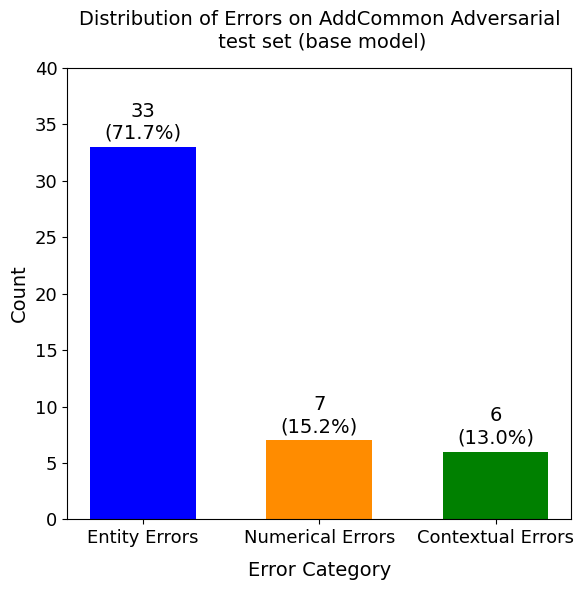

In [146]:
plot_bar(ylim=40, title='Distribution of Errors on AddCommon Adversarial\n test set (base model)')

##### Combined Group Bar Chart (AddSent vs AddAny vs AddCommon)

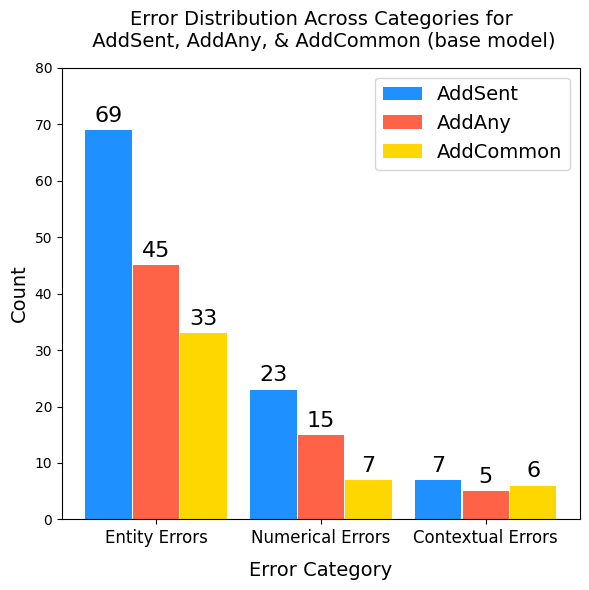

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Define the categories
category_names_addSent = categories.keys()

# Data for AddSent, AddAny, and AddCommon
categories_addSent = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}
categories_addAny = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}
categories_addCommon = {
    "Entity Errors": [],
    "Numerical Errors": [],
    "Contextual Errors": []
}

# Function to classify each example
def classify_example(path, categories):
    # Read the JSONL file and classify each example for AddOneSent
    with open(path, 'r') as file:
        for line in file:
            example = json.loads(line)
            category = classify_error(example)
            categories[category].append(example)

classify_example('addSent_incorrect_pred.jsonl', categories_addSent)
classify_example('addAny_incorrect_pred.jsonl', categories_addAny)
classify_example('addCommon_incorrect_pred.jsonl', categories_addCommon)

counts_addSent = [len(examples) for examples in categories_addSent.values()]
counts_addAny = [len(examples) for examples in categories_addAny.values()]
counts_addCommon = [len(examples) for examples in categories_addCommon.values()]

# Create grouped bar chart with padding
x = np.arange(len(category_names_addSent))  # the label locations
width = 0.35  # the width of the bars
padding = 0.01  # padding between bars

fig, ax = plt.subplots(figsize=(6, 6))
# Adjust x to add padding between groups
x = np.arange(len(category_names_addSent)) * (width * 3 + padding * 20)

bars1 = ax.bar(x - width - padding, counts_addSent, width, label='AddSent', color='dodgerblue')
bars2 = ax.bar(x, counts_addAny, width, label='AddAny', color='tomato')
bars3 = ax.bar(x + width + padding, counts_addCommon, width, label='AddCommon', color='gold')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Error Category', fontsize=14, labelpad=10)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Error Distribution Across Categories for\n AddSent, AddAny, & AddCommon (base model)', fontsize=14, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(category_names_addSent, fontsize=12)
ax.legend(fontsize=14)

# Add counts above the bars
def add_counts(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=16)  # Increase fontsize here

add_counts(bars1)
add_counts(bars2)
add_counts(bars3)

plt.tight_layout()
plt.ylim(0, 80)
plt.show()

#### Misc Script - Checking how many perturbed/unperturbed contexts are there in adv set (addOne)

In [148]:
import json

# Function to check if context is perturbed
def is_perturbed(context, original_contexts):
    for original in original_contexts:
        if context == original:
            return False
    return True

# Check each context in the adversarial dataset
def check_adv_data(adversarial_data, original_contexts):
    perturbed_count = 0
    unperturbed_count = 0

    for example in adversarial_data:
        context = example['context']
        if is_perturbed(context, original_contexts):
            perturbed_count += 1
        else:
            unperturbed_count += 1

    return perturbed_count, unperturbed_count


# Load the original SQuAD dataset
with open('../eval_output/eval_predictions.jsonl', 'r') as file:
    original_data = [json.loads(line) for line in file]
    original_contexts = [example['context'] for example in original_data]

adversarial_data_addSent = []
adversarial_data_addOneSent = []

# Load the squad_adversarial dataset addSent
with open('../adv_addSent/eval_output/eval_predictions.jsonl', 'r') as file:
    adversarial_data_addSent = [json.loads(line) for line in file]

# Load the squad_adversarial dataset addOneSent
with open('../adv_addAny/eval_output/eval_predictions.jsonl', 'r') as file:
    adversarial_data_addOneSent += [json.loads(line) for line in file]

# Check each context in the adversarial dataset addSent
perturbed_count, unperturbed_count = check_adv_data(adversarial_data_addSent, original_contexts)

# Print the results
print("AddSent Adversarial Dataset:")
print(f"Perturbed contexts: {perturbed_count}")
print(f"Unperturbed contexts: {unperturbed_count}")

# Check each context in the adversarial dataset addOneSent
perturbed_count, unperturbed_count = check_adv_data(adversarial_data_addOneSent, original_contexts)

# Print the results
print("AddOneSent Adversarial Dataset:")
print(f"Perturbed contexts: {perturbed_count}")
print(f"Unperturbed contexts: {unperturbed_count}")

AddSent Adversarial Dataset:
Perturbed contexts: 150
Unperturbed contexts: 0
AddOneSent Adversarial Dataset:
Perturbed contexts: 150
Unperturbed contexts: 0
